## Imbalanced Dataset Handling
1. Updampling 
2. Down Sampling

In [4]:
import numpy as np
import pandas as pd

In [5]:
# Set the random seed for reproducibility
np.random.seed(123)

# Create a dataframe with two classes
n_samples = 1000
class_0_ratio = 0.9
n_class_0 = int(n_samples * class_0_ratio)
n_class_1 = n_samples - n_class_0

In [6]:
n_class_0, n_class_1

(900, 100)

In [7]:
class_0 = pd.DataFrame({
    'feature_1' : np.random.normal(loc=0, scale=1, size=n_class_0),
    'feature_2' : np.random.normal(loc=0, scale=1, size=n_class_0),
    'target': [0] * n_class_0
})

class_1 = pd.DataFrame({
    'feature_1' : np.random.normal(loc=2, scale=1, size=n_class_1),
    'feature_2' : np.random.normal(loc=2, scale=1, size=n_class_1),
    'target': [1] * n_class_1
})

In [8]:
df = pd.concat([class_0,class_1]).reset_index(drop=True)

In [9]:
df.head()

,feature_1,feature_2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0


In [10]:
df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

 ## Upsampling

In [11]:
df_minority = df[df['target']==1]
df_majority = df[df['target']==0]

In [12]:
df_minority.head()

,feature_1,feature_2,target
900,1.699768,2.139033,1
901,1.367739,2.025577,1
902,1.795683,1.803557,1
903,2.213696,3.312255,1
904,3.033878,3.187417,1


In [13]:
df_majority.head()

,feature_1,feature_2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0


In [14]:
## Upsampling perform

from sklearn.utils import resample

In [15]:
df_minority_upsample = resample(df_minority,
                                replace=True, ## Sample with replacement
                                n_samples=len(df_majority), # to match the majority class)
                                random_state=42
                                             )

In [16]:
df_minority_upsample.shape

(900, 3)

In [17]:
df_minority_upsample.head()

,feature_1,feature_2,target
951,1.125854,1.843917,1
992,2.196570,1.397425,1
914,1.932170,2.998053,1
971,2.272825,3.034197,1
960,2.870056,1.550485,1


In [18]:
df_minority_upsample['target'].value_counts()

target
1    900
Name: count, dtype: int64

In [19]:
df_upsampled = pd.concat([df_majority,df_minority_upsample])

In [20]:
df_upsampled.head()

,feature_1,feature_2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0


In [21]:
df_upsampled.tail()

,feature_1,feature_2,target
952,1.188902,2.189189,1
965,3.919526,1.980541,1
976,2.810326,3.604614,1
942,3.621531,2.168229,1
974,1.160887,2.489203,1


In [22]:
df_upsampled.shape

(1800, 3)

In [23]:
## DownSampling 

In [24]:
class_0 = pd.DataFrame({
    'feature_1' : np.random.normal(loc=0, scale=1, size=n_class_0),
    'feature_2' : np.random.normal(loc=0, scale=1, size=n_class_0),
    'target': [0] * n_class_0
})

class_1 = pd.DataFrame({
    'feature_1' : np.random.normal(loc=2, scale=1, size=n_class_1),
    'feature_2' : np.random.normal(loc=2, scale=1, size=n_class_1),
    'target': [1] * n_class_1
})

In [25]:
df = pd.concat([class_0,class_1]).reset_index(drop=True)

In [26]:
df_minority = df[df['target']==1]
df_majority = df[df['target']==0]  

In [27]:
df_majority_downsample = resample(df_majority,
                                replace=False, ## Sample without replacement
                                n_samples=len(df_minority), # to match the minority class)
                                random_state=42
                                             ) 

In [28]:
df_majority_downsample.shape

(100, 3)

In [29]:
df_downsample= pd.concat([df_minority,df_majority_downsample])

In [30]:
df_downsample['target'].value_counts()

target
1    100
0    100
Name: count, dtype: int64

## SMOTE (Synthetic Minority Oversampling Technique

In [31]:
from sklearn.datasets import make_classification

In [32]:
## X independent feature
## y dependent feature
x,y = make_classification(n_samples=1000,n_features=2,n_redundant=0,n_clusters_per_class=1,weights=[0.90],random_state=1)

In [33]:
import pandas as pd
df1=pd.DataFrame(x,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
final_df=pd.concat([df1,df2],axis=1)

In [34]:
final_df.head()

,f1,f2,target
0,1.536830,-1.398694,1
1,1.551108,1.810329,0
2,1.293619,1.010946,0
3,1.119889,1.632518,0
4,1.042356,1.121529,0


In [35]:
final_df['target'].value_counts()

target
0    894
1    106
Name: count, dtype: int64

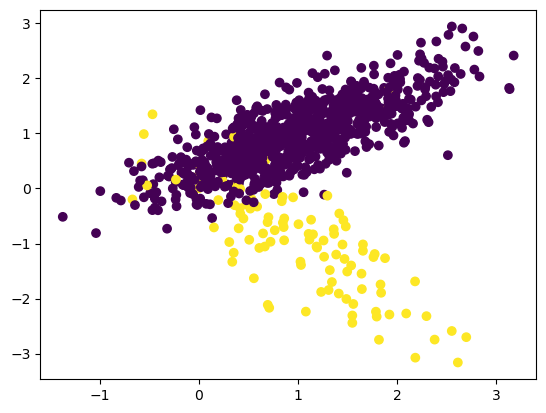

In [36]:
import matplotlib.pyplot as plt
plt.scatter(final_df['f1'],final_df['f2'],c=final_df['target'])

In [37]:
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable


In [38]:
from imblearn.over_sampling import SMOTE

In [39]:
## transform the dataset
oversample=SMOTE()
X,y=oversample.fit_resample(final_df[['f1','f2']],final_df['target'])

In [40]:
X.shape

(1788, 2)

In [41]:
y.shape

(1788,)

In [42]:
len(y[y==0])

894

In [43]:
len(y[y==1])

894

In [44]:
df1=pd.DataFrame(X,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
oversample_df=pd.concat([df1,df2],axis=1)

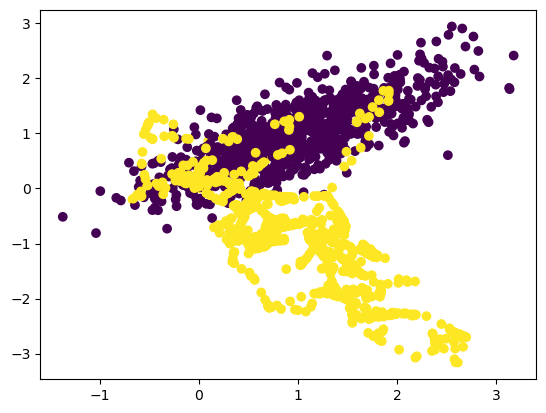

In [45]:
plt.scatter(oversample_df['f1'],oversample_df['f2'],c=oversample_df['target'])